In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

#my imports
import env
import os
import wrangle as w
import acquire

In [2]:
#Get my data
df = w.acquire_zillow()

### Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52441 non-null  int64  
 1   propertylandusetypeid         52441 non-null  float64
 2   typeconstructiontypeid        76 non-null     float64
 3   storytypeid                   47 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   architecturalstyletypeid      70 non-null     float64
 6   buildingclasstypeid           0 non-null      float64
 7   heatingorsystemtypeid         33935 non-null  float64
 8   id                            52441 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   52441 non-null  float64
 11  bedroomcnt                    52441 non-null  float64
 12  buildingqualitytypeid         33740 non-null  float64
 13  c

In [4]:
df = w.prepare_zillow(df)

In [6]:
#df = w.handle_missing_values(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50709 entries, 0 to 52440
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50709 non-null  int64  
 1   propertylandusetypeid         50709 non-null  float64
 2   basementsqft                  50709 non-null  float64
 3   bathroomcnt                   50709 non-null  float64
 4   bedroomcnt                    50709 non-null  float64
 5   calculatedbathnbr             50709 non-null  float64
 6   decktypeid                    50709 non-null  float64
 7   calculatedfinishedsquarefeet  50709 non-null  float64
 8   finishedsquarefeet12          50709 non-null  float64
 9   fips                          50709 non-null  float64
 10  fireplacecnt                  50709 non-null  float64
 11  fullbathcnt                   50709 non-null  float64
 12  hashottuborspa                50709 non-null  float64
 13  l

In [6]:
#Split the data
train, validate, test = w.train_validate_test_split(df)

In [7]:
train.head()

,parcelid,propertylandusetypeid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,typeconstructiondesc,propertylandusedesc,county
23412,11362096,261.0,0.0,2.0,3.0,2.0,0.0,1395.0,1395.0,6037.0,...,106739.0,2543.78,N,99999.0,6.037920e+13,-0.003681,2017-05-10,None,Single Family Residential,Los Angeles
42052,12956704,261.0,0.0,2.0,2.0,2.0,0.0,1613.0,1613.0,6037.0,...,191541.0,4313.70,N,99999.0,6.037430e+13,0.015406,2017-07-28,None,Single Family Residential,Los Angeles
33235,11346275,261.0,0.0,3.0,5.0,3.0,0.0,3216.0,3216.0,6037.0,...,218079.0,7728.70,N,99999.0,6.037920e+13,0.016512,2017-06-22,None,Single Family Residential,Los Angeles
14291,14051806,261.0,0.0,3.0,5.0,3.0,0.0,1883.0,1883.0,6059.0,...,267404.0,4577.40,N,99999.0,6.059099e+13,-0.093892,2017-03-29,None,Single Family Residential,Orange
12549,11927636,261.0,0.0,2.0,3.0,2.0,0.0,1272.0,1272.0,6037.0,...,394560.0,6523.91,N,99999.0,6.037432e+13,0.010795,2017-03-21,None,Single Family Residential,Los Angeles


(array([1.0000e+00, 0.0000e+00, 1.9000e+01, 9.0000e+00, 1.1600e+02,
        3.4189e+04, 1.0430e+03, 6.0000e+01, 5.1000e+01, 6.0000e+00]),
 array([-4.453964  , -3.66911319, -2.88426239, -2.09941158, -1.31456077,
        -0.52970997,  0.25514084,  1.03999165,  1.82484245,  2.60969326,
         3.39454407]),
 <BarContainer object of 10 artists>)

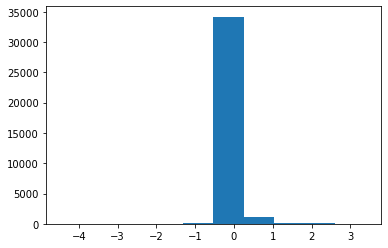

In [10]:
plt.hist(train['logerror'])

### Question 1: Does location have a relationship with log error?

In [11]:
train.county.value_counts()

Los Angeles    23017
Orange          9462
Ventura         3015
Name: county, dtype: int64

In [16]:
LA = train[train.county == 'Los Angeles']
Orange = train[train.county == 'Orange']
Ventura = train[train.county == 'Ventura']

In [17]:
print(f'LA Log Error mean:{LA.logerror.mean()}')
print(f'Orange Log Error mean:{Orange.logerror.mean()}')
print(f'Ventura Log Error mean:{Ventura.logerror.mean()}')

LA Log Error mean:0.01579096118410842
Orange Log Error mean:0.025162274725869117
Ventura Log Error mean:0.016092555362402595


In [18]:
print(f'LA Log Error median:{LA.logerror.median()}')
print(f'Orange Log Error median:{Orange.logerror.median()}')
print(f'Ventura Log Error median:{Ventura.logerror.median()}')

LA Log Error median:0.00615464860088
Orange Log Error median:0.008278201301300001
Ventura Log Error median:0.00622186990596


In [19]:
#Checking variance before running test
from scipy.stats import levene
stat, p = levene(LA.logerror, Orange.logerror, Ventura.logerror)
stat, p

(24.740788821910424, 1.8310288100934043e-11)

In [23]:
#Variances are different, now running a t-test anova
f, p = stats.f_oneway(LA.logerror, Orange.logerror, Ventura.logerror)
f, p

(10.040261801434172, 4.373234705515068e-05)

### The difference in log error with counties is significant, with Orange county having the highest amount of log error and LA county having the lowest

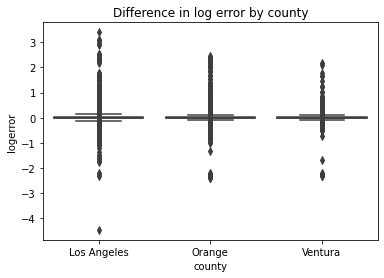

In [27]:
sns.boxplot(x=train.county, y=train.logerror)
plt.title("Difference in log error by county")
plt.show()

### Question 2: Do properties with more than 4 bedrooms have more or less log error than properties with less than four bedrooms? Or, does a larger home (5+ bedrooms) give greater error in prediction than a smaller home?

In [42]:
more_beds = train[train.bedroomcnt > 4]
less_beds = train[train.bedroomcnt <= 4]

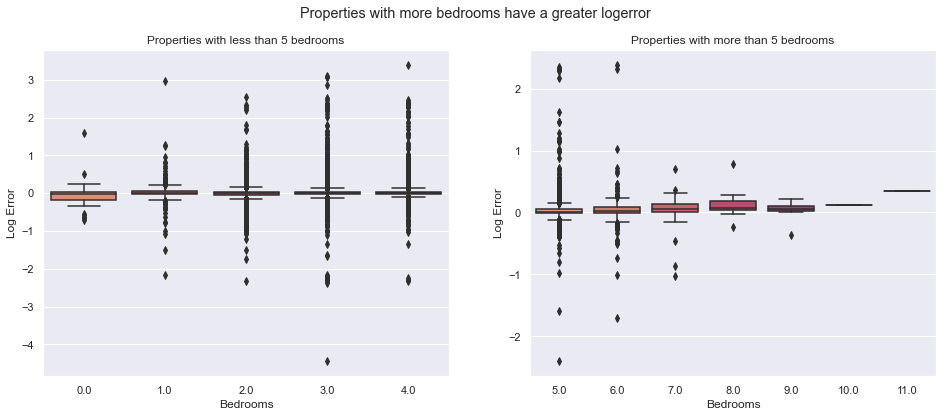

In [44]:
#Set Style and Palette
sns.set_style()
# Define Axes and plot 2 boxplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6), sharey=False)
sns.boxplot(data=less_beds, x='bedroomcnt', y='logerror', palette = 'flare', ax=ax1)
sns.boxplot(data=more_beds, x='bedroomcnt', y='logerror', palette = 'flare', ax=ax2)
#Set Plot Titles
ax1.set_title ("Properties with less than 5 bedrooms")
ax2.set_title("Properties with more than 5 bedrooms")
plt.suptitle ("Properties with more bedrooms have a greater logerror")
#Set Plot Labels Subplot 1
ax1.set_xlabel( "Bedrooms")
ax1.set_ylabel( "Log Error")
# Set plot labels subplot 2
ax2.set_xlabel( "Bedrooms")
ax2.set_ylabel( "Log Error")
#Make the plot
plt.show()

In [33]:
print(f'Median Log Error for homes with 5 or more bedrooms: {more_beds.logerror.median()}')
print(f'Median Log Error for homes with less than 5 bedrooms: {less_beds.logerror.median()}')

Median Log Error for homes with 5 or more bedrooms: 0.0166968016188999
Median Log Error for homes with less than 5 bedrooms: 0.0060611149166099


In [44]:
print(f'Mean Log Error for homes with 5 or more bedrooms: {more_beds.logerror.mean()}')
print(f'Mean Log Error for homes with less than 5 bedrooms: {less_beds.logerror.mean()}')

Mean Log Error for homes with 5 or more bedrooms: 0.03510589937672131
Mean Log Error for homes with less than 5 bedrooms: 0.016673222513179257


In [45]:
## There are some serious outliers in both, maybe could be addressed by removing outliers in other areas

In [46]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [48]:
def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

In [47]:
get_upper_outliers(train['logerror'], k=1.5)

23412                   0.00
42052                   0.00
33235                   0.00
14291                   0.00
12549                   0.00
                ...         
8840                    0.00
33322                   0.05
31771                   0.00
18684                   0.00
20765                   0.00
Name: logerror, Length: 35494, dtype: float64

In [49]:
add_upper_outlier_columns(train, k=1.5)

,parcelid,propertylandusetypeid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,yearbuilt_outliers,fireplaceflag_outliers,structuretaxvaluedollarcnt_outliers,taxvaluedollarcnt_outliers,assessmentyear_outliers,landtaxvaluedollarcnt_outliers,taxamount_outliers,taxdelinquencyyear_outliers,censustractandblock_outliers,logerror_outliers
23412,11362096,261.00,0.00,2.00,3.00,2.00,0.00,"1,395.00","1,395.00","6,037.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
42052,12956704,261.00,0.00,2.00,2.00,2.00,0.00,"1,613.00","1,613.00","6,037.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
33235,11346275,261.00,0.00,3.00,5.00,3.00,0.00,"3,216.00","3,216.00","6,037.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14291,14051806,261.00,0.00,3.00,5.00,3.00,0.00,"1,883.00","1,883.00","6,059.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12549,11927636,261.00,0.00,2.00,3.00,2.00,0.00,"1,272.00","1,272.00","6,037.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8840,12878014,261.00,0.00,1.00,3.00,1.00,0.00,"1,042.00","1,042.00","6,037.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
33322,13940683,261.00,0.00,2.00,3.00,2.00,0.00,"2,029.00","2,029.00","6,059.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05
31771,12892391,261.00,0.00,2.00,3.00,2.00,0.00,"1,754.00","1,754.00","6,037.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18684,11266023,261.00,0.00,3.00,5.00,3.00,0.00,"3,112.00","3,112.00","6,037.00",...,0,0.00,"4,770.50",0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [52]:
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = train[col][train[col] > 0]
    print(train.describe())

In [58]:
train[train.bedroomcnt_outliers > 0]

,parcelid,propertylandusetypeid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,yearbuilt_outliers,fireplaceflag_outliers,structuretaxvaluedollarcnt_outliers,taxvaluedollarcnt_outliers,assessmentyear_outliers,landtaxvaluedollarcnt_outliers,taxamount_outliers,taxdelinquencyyear_outliers,censustractandblock_outliers,logerror_outliers
47488,11742468,261.00,0.00,3.00,6.00,3.00,0.00,"5,084.00","5,084.00","6,037.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
36037,11983747,261.00,0.00,6.00,9.00,6.00,0.00,"9,708.00","9,708.00","6,037.00",...,0,0.00,"734,770.50","713,760.50",0.00,0.00,"9,969.51",0.00,0.00,0.00
3786,14169434,261.00,0.00,3.50,6.00,3.50,0.00,"3,636.00","3,636.00","6,059.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19341,14073554,261.00,0.00,2.00,6.00,2.00,0.00,"1,869.00","1,869.00","6,059.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
41119,14204682,261.00,0.00,4.50,6.00,4.50,0.00,"3,911.00","3,911.00","6,059.00",...,0,0.00,"33,222.50",0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15345,14206890,261.00,0.00,3.50,6.00,3.50,0.00,"4,072.00","4,072.00","6,059.00",...,0,0.00,"62,733.50",0.00,0.00,0.00,0.00,0.00,0.00,0.00
32579,13053603,261.00,0.00,6.00,6.00,6.00,0.00,"3,796.00","3,796.00","6,037.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4948,12115719,261.00,0.00,2.00,6.00,2.00,0.00,"2,706.00","2,706.00","6,037.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2879,12187943,261.00,0.00,3.00,6.00,3.00,0.00,"2,909.00","2,909.00","6,037.00",...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08


In [59]:
#Comparing these two with a t-test-levene test first
stat, p = levene(less_beds.logerror, more_beds.logerror)
stat, p
#Variances are not equal so we set variance equal to false

(6.826488996121224, 0.008985349954872027)

In [60]:
#Running a t-test
t, p = stats.ttest_ind(less_beds.logerror, more_beds.logerror, equal_var=False)
t, p

(-5.2826076338619625, 1.3471741835903943e-07)

#### These two groups are different in respect to log error. So number of bedrooms set at 5 or higher shows a higher mean and median log error

### Question 3: Zip Code

In [10]:
#Total number of zip codes in this dataset
train.regionidzip.value_counts().nunique()

174

In [14]:
#Looking at properties with higher log error
train[(train.logerror > 2) | (train.logerror < -2)]

,parcelid,propertylandusetypeid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,typeconstructiondesc,propertylandusedesc,county
23710,12690437,261.0,0.0,2.0,4.0,2.0,0.0,1834.0,1834.0,6037.0,...,417014.0,6771.62,N,99999.0,6.037670e+13,2.314968,2017-05-11,None,Single Family Residential,Los Angeles
43934,14081343,261.0,0.0,3.5,3.0,3.5,0.0,4138.0,4138.0,6059.0,...,849409.0,13585.16,N,99999.0,6.059100e+13,2.383205,2017-08-09,None,Single Family Residential,Orange
19990,10885349,261.0,0.0,2.0,2.0,2.0,0.0,1464.0,1464.0,6037.0,...,34354.0,1055.82,N,99999.0,6.037124e+13,2.207293,2017-04-26,None,Single Family Residential,Los Angeles
28154,14124370,261.0,0.0,2.5,3.0,2.5,0.0,2088.0,2088.0,6059.0,...,554083.0,7838.92,N,99999.0,6.059110e+13,-2.387800,2017-05-31,None,Single Family Residential,Orange
46009,14035114,261.0,0.0,2.0,3.0,2.0,0.0,1288.0,1288.0,6059.0,...,188036.0,3645.04,N,99999.0,6.059099e+13,-2.283001,2017-08-18,None,Single Family Residential,Orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35632,12562832,261.0,0.0,1.0,3.0,1.0,0.0,1206.0,1206.0,6037.0,...,241000.0,4356.00,N,99999.0,6.037542e+13,-4.453964,2017-06-30,None,Single Family Residential,Los Angeles
20057,12257151,261.0,0.0,1.0,3.0,1.0,0.0,1100.0,1100.0,6037.0,...,10129.0,1053.56,N,99999.0,6.037541e+13,2.479045,2017-04-26,None,Single Family Residential,Los Angeles
45500,10864240,261.0,0.0,2.0,2.0,2.0,0.0,2139.0,2139.0,6037.0,...,466129.0,7117.00,N,99999.0,6.037142e+13,-2.331727,2017-08-16,None,Single Family Residential,Los Angeles
51513,13939671,261.0,0.0,5.0,6.0,5.0,0.0,3623.0,3623.0,6059.0,...,368895.0,7615.36,N,99999.0,6.059076e+13,2.319256,2017-09-13,None,Single Family Residential,Orange


In [8]:
# Extreme log error happens in LA County more frequently

### Question: Square Footage and Log Error

In [11]:
print(f'Median Square Feet of properties in train: {train.calculatedfinishedsquarefeet.median()}')
print(f'Mean Square Feet of properties in train: {train.calculatedfinishedsquarefeet.mean()}')

Median Square Feet of properties in train: 1650.5
Mean Square Feet of properties in train: 1912.0232151912999


In [12]:
len(train)

35494

In [20]:
small_house = train[train.calculatedfinishedsquarefeet < 1912]
large_house = train[train.calculatedfinishedsquarefeet >= 1912]

In [23]:
print(f'Number of small Homes in Train: {len(small_house)}')
print(f'Number of large Homes in Train: {len(large_house)}')

Number of small Homes in Train: 22150
Number of large Homes in Train: 13344


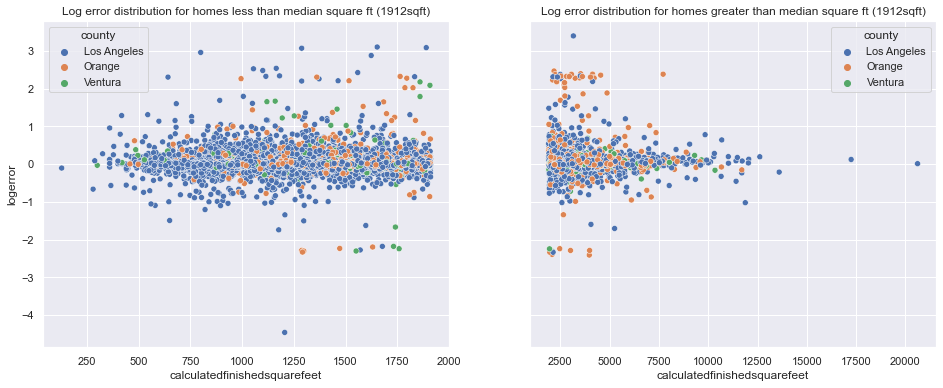

In [34]:
#Make a scatterplot comparing smaller and larger homes (by square feet)
#Set Seaborn Style
sns.set_theme()
#Set Plot Size
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6), sharey=True)
sns.scatterplot(data=small_house, x='calculatedfinishedsquarefeet', y='logerror', hue = 'county', ax=ax1)
ax1.set_title('Log error distribution for homes less than median square ft (1912sqft)')
sns.scatterplot(data=large_house, x='calculatedfinishedsquarefeet', y='logerror', hue = 'county', ax=ax2)
ax2.set_title('Log error distribution for homes greater than median square ft (1912sqft)')
plt.show()

### Running Stats Test to see if the difference in log error is significant

In [35]:
corr, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.logerror)
corr, p

(0.036397035650809276, 6.925766776437704e-12)

In [36]:
#Small correlation between square feet and log error, but significant

### Running Stats Test on Small and Large homes

In [38]:
#Running for small house
corr, p = stats.pearsonr(small_house.calculatedfinishedsquarefeet, small_house.logerror)
corr, p

(-0.008993248403536281, 0.1807642734418404)

#### For small houses, there is no significant relationship between square footage and log error

In [40]:
#Running for larger home
corr, p = stats.pearsonr(large_house.calculatedfinishedsquarefeet, large_house.logerror)
corr, p

(0.04927232517431504, 1.236042613966849e-08)

#### Small relationship between square footage and log error, but it is significant. We can say that larger homes in this data set have a higher amount of log error, and that 

In [48]:
len(train[train.basementsqft == 0])

35460